In [33]:
import os
os.chdir('D:/edwisor/Project/train_cab')

In [34]:
import pandas as pd
import numpy as np

In [35]:
CabCompany = pd.read_csv('train_cab.csv')

In [36]:
#Checking for missing values
CabCompany.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [37]:
#Checking the data
CabCompany.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [38]:
CabCompany['passenger_count'] = CabCompany['passenger_count'].fillna(CabCompany['passenger_count'].mean())

In [39]:
type(CabCompany['fare_amount'])

pandas.core.series.Series

In [40]:
CabCompany['fare_amount']= pd.to_numeric(CabCompany['fare_amount'], errors = 'coerce')

In [41]:
CabCompany['fare_amount'].head(5)

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [42]:
CabCompany['fare_amount'] = CabCompany['fare_amount'].fillna(CabCompany['fare_amount'].mean())

In [43]:
##Creating new variable called distance
Distance = CabCompany[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]


In [44]:
#Converting degrees to radians using numpy library
Distance['pickup_longitude']=(np.deg2rad(Distance['pickup_longitude']))
Distance['pickup_latitude']=(np.deg2rad(Distance['pickup_latitude']))
Distance['dropoff_longitude']=(np.deg2rad(Distance['dropoff_longitude']))
Distance['dropoff_latitude']=(np.deg2rad(Distance['dropoff_latitude']))


C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [45]:
Distance['longitudediff'] = Distance['dropoff_longitude'] - Distance['pickup_longitude']
Distance['latitudediff'] = Distance['dropoff_latitude']-Distance['pickup_latitude']

C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
#Checking distance data set
Distance.head(10)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,longitudediff,latitudediff
0,-1.288826,0.710721,-1.288779,0.710563,0.000047,-0.000158
1,-1.291824,0.710546,-1.291182,0.711780,0.000642,0.001234
2,-1.291242,0.711418,-1.291391,0.711231,-0.000148,-0.000187
3,-1.291319,0.710927,-1.291396,0.711363,-0.000077,0.000435
4,-1.290987,0.711536,-1.290787,0.711811,0.000200,0.000275
5,-1.291560,0.710901,-1.291071,0.711365,0.000490,0.000464
6,-1.291195,0.711251,-1.291086,0.711481,0.000108,0.000230
7,-1.290694,0.711643,-1.291371,0.711240,-0.000677,-0.000403
8,-1.291656,0.710815,-1.291423,0.710901,0.000234,0.000086
9,-1.291206,0.710940,-1.291396,0.711364,-0.000190,0.000424


In [47]:
#Calculation of distance
a = (np.sin(Distance['latitudediff']/2)*np.sin(Distance['latitudediff']/2))+np.cos(Distance['pickup_latitude'])*np.cos(Distance['dropoff_latitude'])*np.sin(Distance['longitudediff']/2)*np.sin(Distance['longitudediff']/2)

In [48]:
c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))


In [49]:
Distance['distance_covered'] = 6371*c


In [50]:
Distance.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,longitudediff,latitudediff,distance_covered
0,-1.288826,0.710721,-1.288779,0.710563,0.000047,-0.000158,1.030764
1,-1.291824,0.710546,-1.291182,0.711780,0.000642,0.001234,8.450134
2,-1.291242,0.711418,-1.291391,0.711231,-0.000148,-0.000187,1.389525
3,-1.291319,0.710927,-1.291396,0.711363,-0.000077,0.000435,2.799270
4,-1.290987,0.711536,-1.290787,0.711811,0.000200,0.000275,1.999157


{'whiskers': [<matplotlib.lines.Line2D at 0x1a7ecbda518>,
 'caps': [<matplotlib.lines.Line2D at 0x1a7ecbdaba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a7ecbda208>],
 'medians': [<matplotlib.lines.Line2D at 0x1a7ecc1e278>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a7ecc1e5c0>],
 'means': []}

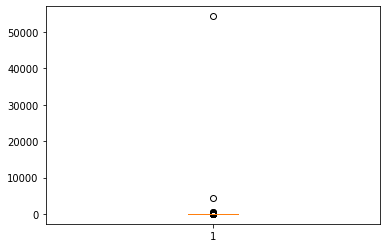

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.boxplot(CabCompany['fare_amount'])

In [52]:
##Removing all unneccesary variables
CabCompany = CabCompany.drop(CabCompany.columns[1],axis =1)
CabCompany = CabCompany.drop(CabCompany.columns[1],axis =1)
CabCompany = CabCompany.drop(CabCompany.columns[1],axis =1)
CabCompany = CabCompany.drop(CabCompany.columns[1],axis =1)
CabCompany = CabCompany.drop(CabCompany.columns[1],axis =1)

In [53]:
#Adding calculated variable to train data set
CabCompany['distance_covered']=Distance['distance_covered']

In [54]:
CabCompany.head(5)

,fare_amount,passenger_count,distance_covered
0,4.5,1.0,1.030764
1,16.9,1.0,8.450134
2,5.7,2.0,1.389525
3,7.7,1.0,2.799270
4,5.3,1.0,1.999157


In [56]:
cnames = ['fare_amount' , 'passenger_count','distance_covered']

{'whiskers': [<matplotlib.lines.Line2D at 0x11b4fb15908>,
 'caps': [<matplotlib.lines.Line2D at 0x11b4fb15f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b4fb155f8>],
 'medians': [<matplotlib.lines.Line2D at 0x11b4fb1f668>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b4fb1f9b0>],
 'means': []}

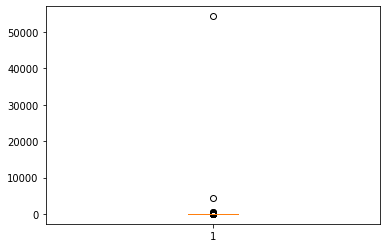

In [336]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(CabCompany['fare_amount'])

In [57]:
#Removing outliers from data
for i in cnames:
     print(i)
     q75, q25 = np.percentile(CabCompany.loc[:,i], [75 ,25])
     iqr = q75 - q25

     min = q25 - (iqr*1.5)
     max = q75 + (iqr*1.5)
     print(min)
     print(max)
    
     CabCompany = CabCompany.drop(CabCompany[CabCompany.loc[:,i] < min].index)
     CabCompany = CabCompany.drop(CabCompany[CabCompany.loc[:,i] > max].index)

fare_amount
-3.75
22.25
passenger_count
-0.5
3.5
distance_covered
-1.9988514146031071
6.427098822998074


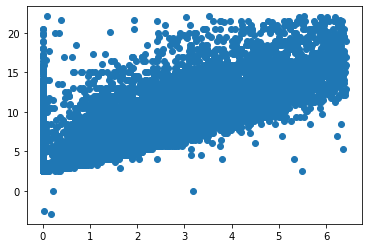

In [30]:
plt.scatter(CabCompany['distance_covered'],CabCompany['fare_amount'])

In [58]:
CabCompany.shape

(12514, 3)

In [59]:
##Multiple Linear regression
#Importing statsmodels.api module as sm
import statsmodels.api as sm

In [60]:
#Distributing data to build  linear regression model
#X goes as independent variables
#Y goes as dependent variable
X = CabCompany.values[:,1:].astype(float)
Y = CabCompany.values[:,0].astype(float)

In [61]:
Linearmodel = sm.OLS(Y, X).fit()

In [62]:
Linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                          6.404e+04
Date:                Thu, 18 Jul 2019   Prob (F-statistic):                        0.00
Time:                        12:07:59   Log-Likelihood:                         -30487.
No. Observations:               12514   AIC:                                  6.098e+04
Df Residuals:                   12512   BIC:                                  6.099e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0876      0.028     73.741      0.000       2.032       2.143
x2             2.4458      0.015    166.963      0.000       2.417       2.475
==============================================================================
Omnibus:                     2558.195   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10159.573
Skew:                           0.971   Prob(JB):                         0.00
Kurtosis:                       6.964   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#predicting implemented model on the same data to calculate error metrics accurately
predictions = Linearmodel.predict(X) 

C:\Users\Subhash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


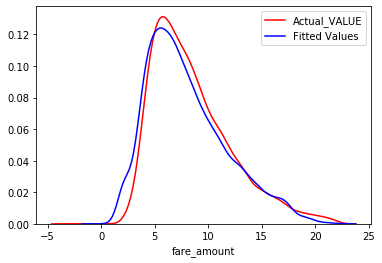

In [64]:
import seaborn as sns
ax1 = sns.distplot(CabCompany['fare_amount'] , hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(predictions, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)

In [66]:
#importing metrics function from sklearn module
from sklearn import metrics

In [67]:
metrics.mean_squared_error(Y,predictions)

7.649500970543439

In [68]:
metrics.mean_absolute_error(Y,predictions)

1.9355695848112864

In [69]:
np.sqrt(metrics.mean_absolute_error(Y,predictions))

1.3912474922929012

In [76]:
##Decision tree
#importing sklearn.tree module for decision tree regressor as it is a regression  analysis and predicting the values
from sklearn.tree import DecisionTreeRegressor
fit_DT = DecisionTreeRegressor(max_depth=2).fit(X,Y)
predictions_DT = fit_DT.predict(X)


In [77]:
metrics.mean_squared_error(Y,predictions_DT)

5.966881266599735

In [87]:
cnames2 = ['passenger_count','distance_covered']

Index(['fare_amount', 'passenger_count', 'distance_covered'], dtype='object')

In [88]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = open('pt.dot','w')
export_graphviz(fit_DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cnames2)

In [79]:
metrics.mean_absolute_error(Y,predictions_DT)

1.7804318449448922

In [80]:
np.sqrt(metrics.mean_absolute_error(Y,predictions_DT))

1.3343282373332628

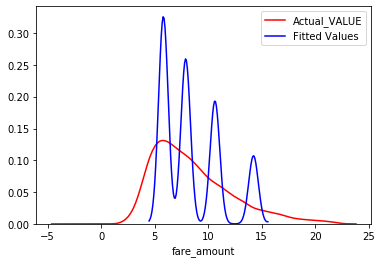

In [82]:
import seaborn as sns
ax1 = sns.distplot(CabCompany['fare_amount'] , hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(predictions_DT, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)

In [89]:
### Importing RandomForest Regressor from sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [90]:
X = CabCompany.values[:,1:].astype(float)
Y = CabCompany.values[:,0].astype(float)

In [91]:
fit_RM = RandomForestRegressor(n_estimators = 20).fit(X,Y)

In [93]:
RF_Predictions = fit_RM.predict(X)

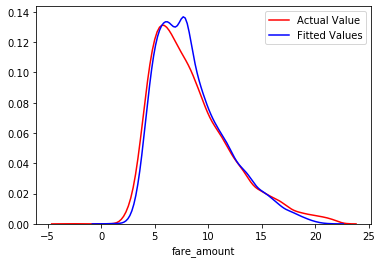

In [97]:
import seaborn as sns
ax1 = sns.distplot(CabCompany['fare_amount'],hist = False,color = 'r',label = 'Actual Value')
sns.distplot(RF_Predictions,hist = False , color ='b',label = 'Fitted Values',ax=ax1)

In [129]:
fit_RM

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [98]:
new=pd.DataFrame(RF_Predictions)
old = pd.DataFrame(Y)
m=np.mean(np.abs((old - new) / old))
m

0    inf
dtype: float64

In [99]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [100]:
MAPE(old, new)

0    inf
dtype: float64

In [101]:
metrics.mean_squared_error(Y,RF_Predictions)

1.4703340521994421

In [102]:
metrics.mean_absolute_error(Y,RF_Predictions)

0.7838841696968645

In [103]:
np.sqrt(metrics.mean_absolute_error(Y,RF_Predictions))

0.8853723339346359

In [119]:
#Loading Test Data
CabCompany_test = pd.read_csv('test.csv')

In [120]:
#Converting degrees to radians using numpy library
Distance_test = CabCompany_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
Distance_test['pickup_longitude']=(np.deg2rad(Distance_test['pickup_longitude']))
Distance_test['pickup_latitude']=(np.deg2rad(Distance_test['pickup_latitude']))
Distance_test['dropoff_longitude']=(np.deg2rad(Distance_test['dropoff_longitude']))
Distance_test['dropoff_latitude']=(np.deg2rad(Distance_test['dropoff_latitude']))


C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [121]:
#Data Preprocessing
Distance_test['longitudediff'] = Distance_test['dropoff_longitude'] - Distance_test['pickup_longitude']
Distance_test['latitudediff'] = Distance_test['dropoff_latitude']-Distance_test['pickup_latitude']

C:\Users\Subhash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
#Calculation of distance on test data
a = (np.sin(Distance_test['latitudediff']/2)*np.sin(Distance_test['latitudediff']/2))+np.cos(Distance_test['pickup_latitude'])*np.cos(Distance_test['dropoff_latitude'])*np.sin(Distance_test['longitudediff']/2)*np.sin(Distance_test['longitudediff']/2)
c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
Distance_test['distance_covered'] = 6371*c

In [123]:
CabCompany_test = CabCompany_test.drop(CabCompany_test.columns[0],axis =1)
CabCompany_test = CabCompany_test.drop(CabCompany_test.columns[0],axis =1)
CabCompany_test = CabCompany_test.drop(CabCompany_test.columns[0],axis =1)
CabCompany_test = CabCompany_test.drop(CabCompany_test.columns[0],axis =1)
CabCompany_test = CabCompany_test.drop(CabCompany_test.columns[0],axis =1)

In [127]:
CabCompany_test['distance_covered'] = Distance_test['distance_covered']

In [ ]:
#Predicting values through fitted model
RF_Predictions_test = fit_RM.predict(CabCompany_test)

In [130]:
CabCompany_test['Predicted_Values'] = RF_Predictions_test
CabCompany_test.head(5)

,passenger_count,distance_covered,Predicted_Values
0,1,2.323259,5.915
1,1,2.425353,11.135
2,1,0.618628,5.425
3,1,1.961033,8.870
4,1,5.387301,18.445
